## In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [5]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns=boston.feature_names)
targets = boston.target

In [3]:
#print(boston.DESCR)

In [6]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [11]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
features['CHAS'].loc[features.CHAS == 1.].count()

35

In [38]:
#features.LSTAT.unique()

In [8]:
x = features.drop(['CHAS'], axis=1)
y = features.CHAS

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.5, random_state=42)

In [55]:
## Normalizing features
from sklearn import preprocessing
scale = preprocessing.MinMaxScaler()
train_data = scale.fit_transform(x_train)
test_data = scale.transform(x_test)

In [77]:
train_data = pd.DataFrame(train_data, columns=['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'])

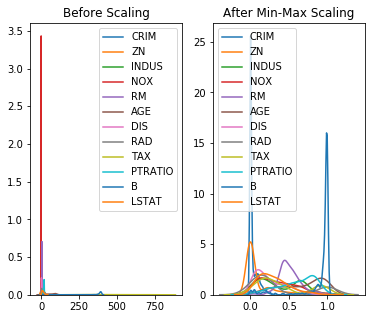

In [78]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x_train['CRIM'], ax=ax1)
sns.kdeplot(x_train['ZN'], ax=ax1)
sns.kdeplot(x_train['INDUS'], ax=ax1)
sns.kdeplot(x_train['NOX'], ax=ax1)
sns.kdeplot(x_train['RM'], ax=ax1)
sns.kdeplot(x_train['AGE'], ax=ax1)
sns.kdeplot(x_train['DIS'], ax=ax1)
sns.kdeplot(x_train['RAD'], ax=ax1)
sns.kdeplot(x_train['TAX'], ax=ax1)
sns.kdeplot(x_train['PTRATIO'], ax=ax1)
sns.kdeplot(x_train['B'], ax=ax1)
sns.kdeplot(x_train['LSTAT'], ax=ax1)
ax2.set_title('After Min-Max Scaling')
sns.kdeplot(train_data['CRIM'], ax=ax2)
sns.kdeplot(train_data['ZN'], ax=ax2)
sns.kdeplot(train_data['INDUS'], ax=ax2)
sns.kdeplot(train_data['NOX'], ax=ax2)
sns.kdeplot(train_data['RM'], ax=ax2)
sns.kdeplot(train_data['AGE'], ax=ax2)
sns.kdeplot(train_data['DIS'], ax=ax2)
sns.kdeplot(train_data['RAD'], ax=ax2)
sns.kdeplot(train_data['TAX'], ax=ax2)
sns.kdeplot(train_data['PTRATIO'], ax=ax2)
sns.kdeplot(train_data['B'], ax=ax2)
sns.kdeplot(train_data['LSTAT'], ax=ax2)
#plt.show()

In [79]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(max_features=10, random_state=1, n_estimators=200)
rf.fit(train_data, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [80]:
rf.score(test_data, y_train)

0.9130434782608695

In [81]:
pred = rf.predict(x_test)

In [82]:
print(accuracy_score(y_test, pred))

0.9169960474308301


In [39]:
list(zip(x.columns, rf.feature_importances_))

[('CRIM', 0.08626955822992538),
 ('ZN', 0.021952007279356714),
 ('INDUS', 0.08107829279501677),
 ('NOX', 0.060621979681885936),
 ('RM', 0.11993964675512285),
 ('AGE', 0.07877290330343577),
 ('DIS', 0.18331420781661883),
 ('RAD', 0.022156432042520508),
 ('TAX', 0.062224160973018014),
 ('PTRATIO', 0.056915817066900305),
 ('B', 0.0709464712258839),
 ('LSTAT', 0.15580852283031502)]